20


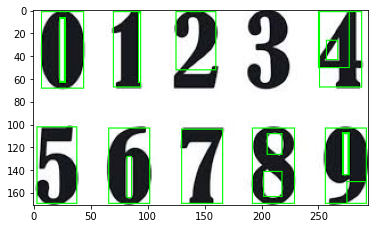

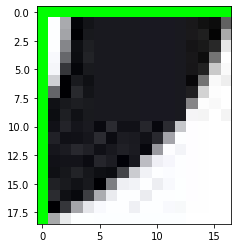

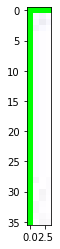

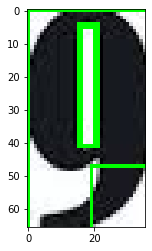

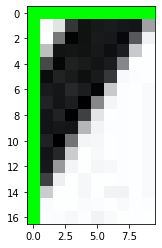

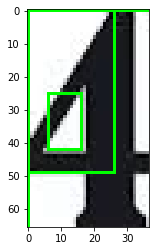

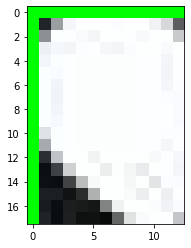

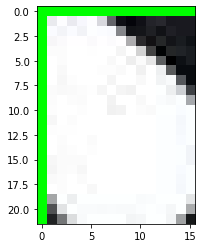

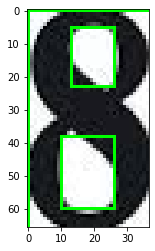

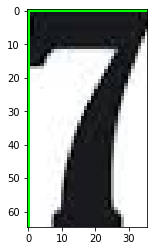

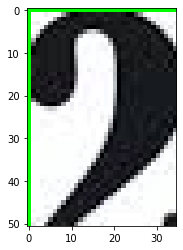

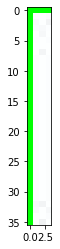

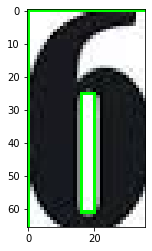

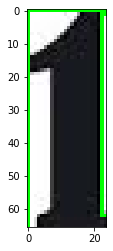

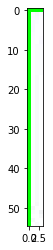

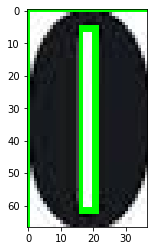

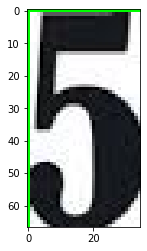

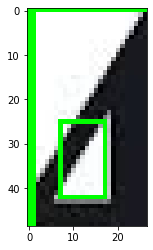

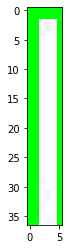

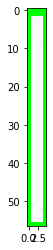

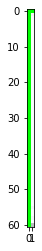

In [1]:
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os

def mser(cv_image):
    digit_num = []
    vis = cv_image.copy()
    gray = cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)
    #gray = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(gray, 30, 200)
    mser = cv2.MSER_create()
    regions, _ = mser.detectRegions(edged)
    for p in regions:
        xmax, ymax = np.amax(p, axis=0)
        xmin, ymin = np.amin(p, axis=0)
        cv2.rectangle(vis, (xmin,ymin), (xmax,ymax), (0, 255, 0), 1)
        digit_num.append(vis[ymin:ymax,xmin:xmax])
    return vis,digit_num

path=r'/root/notebooks/Projects/number-detection/images/test1.jpg'
#save_path='/root/notebooks/Projects/number-detection/images'
img = cv2.imread(path)
new_img,digit_num = mser(img)
print(len(digit_num))
#vis = img.copy()
#cv2.imshow('image', img) 
#img = cv2.imread(path, cv2.IMREAD_GRAYSCALE);
#mser = cv2.MSER_create()
#mser_areas = mser.detect(img, None)
#regions,_ = mser.detectRegions(img)
#hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
#cv2.polylines(vis, hulls, 1, (0, 255, 0))
#print(hulls)
#cv2.imwrite(save_path, new_img)
plt.imshow(new_img)
plt.show()

#print(len(digit_num))
for i in range(len(digit_num)):
    if (len(digit_num[i]>0)):
        plt.imshow(digit_num[i])
        plt.show()
#cv2.imshow('img', vis)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#Resize image to test

#print(resized)
#plt.imshow(resized)
#plt.show()




13


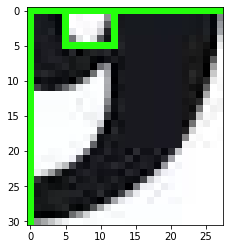

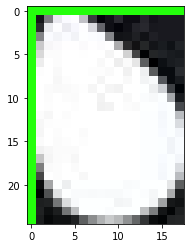

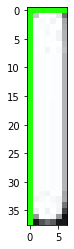

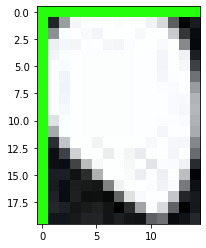

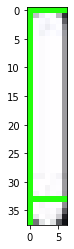

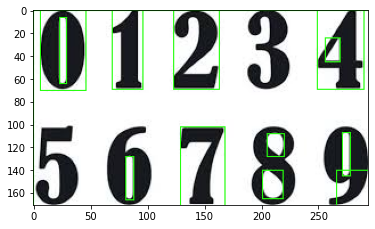

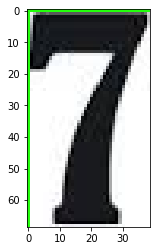

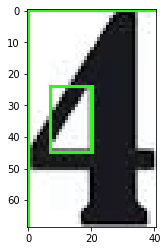

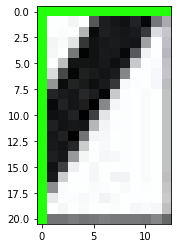

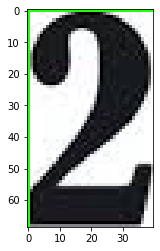

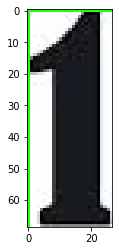

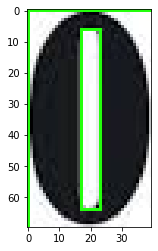

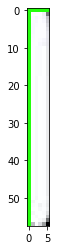

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/root/notebooks/Projects/number-detection/images/test1.jpg', cv2.IMREAD_UNCHANGED)
vis = img.copy()
#convert img to grey
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 100
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
digit_num=[]
for p in contours:
        x,y,w,h = cv2.boundingRect(p)
        cv2.rectangle(vis, (x, y), (x + w, y + h), (36,255,12), 1)
        digit_num.append(vis[y:y+h,x:x+w])   
print(len(digit_num))        
for i in range(len(digit_num)):
    if (len(digit_num[i]>0)):
        plt.imshow(digit_num[i])
        plt.show()
        
        #create an empty image for contours
#img_contours = np.zeros(img.shape)
# draw the contours on the empty image
#plt.imshow(cv2.drawContours(img_contours, contours, -1, (0,255,0), 3))
#plt.show
#save image
#cv2.imwrite('D:/contours.png',img_contours) 

(20, 32, 17, 3)
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
7


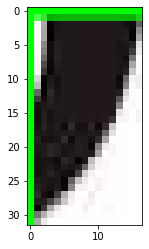

1


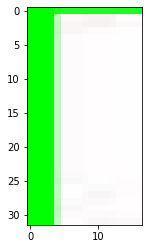

4


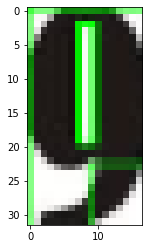

1


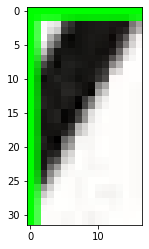

4


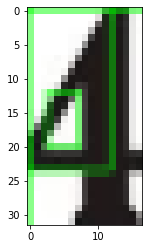

4


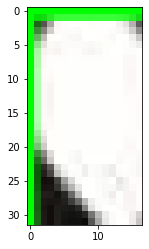

1


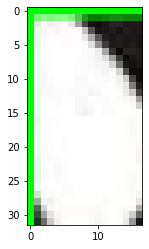

8


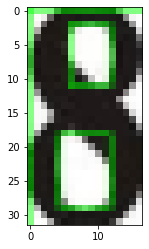

7


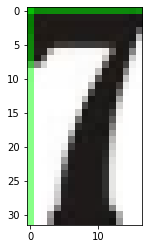

1


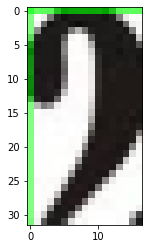

1


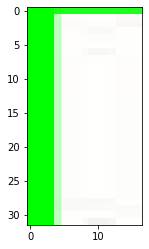

1


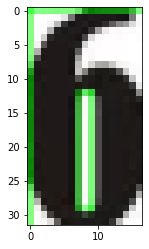

1


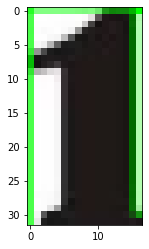

1


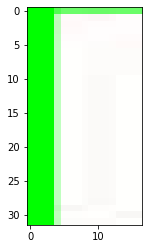

1


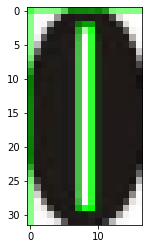

5


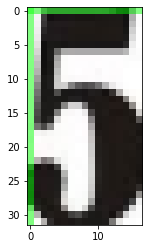

4


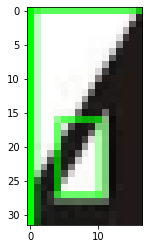

1


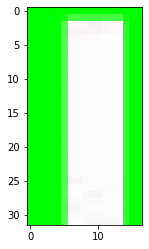

1


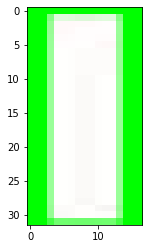

1


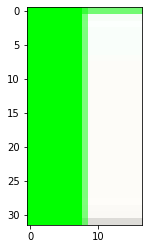

In [2]:
#Upload image test and pre-processing image before using model to test.

width = 17
height = 32
dim = (width, height)
digit_resize=[]

for i in range(len(digit_num)):
    if(len(digit_num[i])>0):
        digit_resize.append(cv2.resize(digit_num[i],dim,interpolation = cv2.INTER_AREA))
        digit_resize[i]=(digit_resize[i][...,::-1].astype(np.float32))/255

digit_arr2 = np.array(digit_resize)
#digit_resize=digit_resize.reshape([1]+list(digit_resize.shape))
print(digit_arr2.shape)
#resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#new_image = (resized[...,::-1].astype(np.float32)) / 255.0
#X = X.reshape(list(X.shape) + [1])  
#new_image= new_image.reshape([1]+list(new_image.shape)) 
#print(new_image.shape)
#Load model and test new image
model=load_model('/root/notebooks/Projects/number-detection/number_model.h5')
#new_image = load_image('/root/notebooks/Projects/number-detection/images/test.png')
pred = model.predict_classes(digit_arr2)
#plt.imshow(new_img)
#plt.show()
#print(pred)
for i in range(len(digit_arr2)):
    print(pred[i])
    plt.imshow(digit_arr2[i])
    plt.show()